In [1]:
import numpy as np
import glob
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data_1 = pd.read_csv('community_dataset.csv')
data_1

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


In [ ]:
Задание 2

В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток, по Оу — их количество. Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной. 

In [2]:
count_community_1=data_1.loc[data_1['cell_interaction'] == 'community_1']
count_community_1

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
13,833.845631,818.200092,8.280475,179.001408,community_1,Stroma cells,891,117,elder_group
16,604.038507,628.217718,6.500649,109.674344,community_1,Stroma cells,891,261,elder_group
17,677.621315,738.981859,12.776360,151.196441,community_1,Stroma cells,891,176,elder_group
...,...,...,...,...,...,...,...,...,...
269386,1074.580958,721.704076,4.772382,24.860308,community_1,Stroma cells,983,243,young_group
269396,928.318246,712.873442,10.110185,79.698735,community_1,Stroma cells,983,240,young_group
269399,916.562408,942.933560,8.369391,34.282472,community_1,Immune type 2,983,268,young_group
269411,1105.756238,604.533705,12.235670,13.722748,community_1,Immune type 2,983,413,young_group


<AxesSubplot: xlabel='cell_type'>

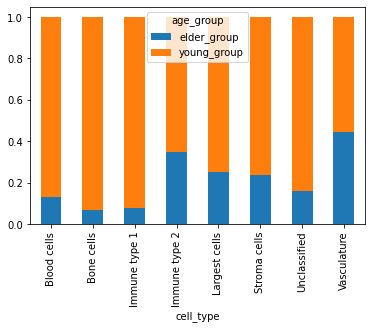

In [4]:
count_community_1.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [8]:
count_community_2=data_1.loc[data_1['cell_interaction'] == 'community_2']
count_community_2
# количество community_2 = 51482

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
6,928.607245,707.710208,21.251381,201.072243,community_2,Stroma cells,891,238,elder_group
14,638.870269,776.426233,17.495790,157.435209,community_2,Stroma cells,891,323,elder_group
19,773.075193,818.785490,63.921637,581.377876,community_2,Stroma cells,891,251,elder_group
20,611.905694,1011.755653,10.672844,184.366908,community_2,Stroma cells,891,250,elder_group
...,...,...,...,...,...,...,...,...,...
269407,1124.831233,717.195392,3.907588,15.896430,community_2,Unclassified,983,189,young_group
269423,885.378417,1020.769712,8.216864,39.660317,community_2,Stroma cells,983,188,young_group
269426,1105.711950,738.742091,8.581935,27.305725,community_2,Stroma cells,983,322,young_group
269428,703.086495,840.464294,18.283574,67.645920,community_2,Stroma cells,983,163,young_group


<AxesSubplot: xlabel='cell_type'>

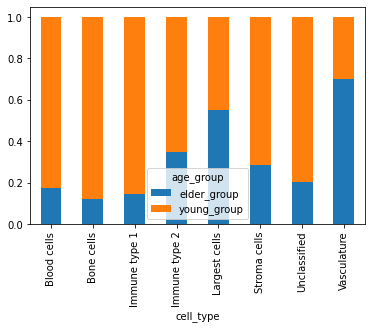

In [9]:
count_community_2.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [11]:
count_community_3=data_1.loc[data_1['cell_interaction'] == 'community_3']
count_community_3

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
5,812.104009,845.400332,17.557133,172.700050,community_3,Unclassified,891,196,elder_group
9,810.869444,687.209613,16.600478,210.507683,community_3,Unclassified,891,140,elder_group
10,766.624118,699.938237,22.002075,229.014747,community_3,Unclassified,891,170,elder_group
...,...,...,...,...,...,...,...,...,...
269269,597.053088,745.045629,11.576168,69.988694,community_3,Stroma cells,983,338,young_group
269336,1015.353830,692.861146,3.610554,10.444451,community_3,Unclassified,983,201,young_group
269356,1063.618275,675.297588,8.839145,60.005738,community_3,Unclassified,983,188,young_group
269412,933.366096,1061.980943,4.625777,13.900044,community_3,Unclassified,983,140,young_group


<AxesSubplot: xlabel='cell_type'>

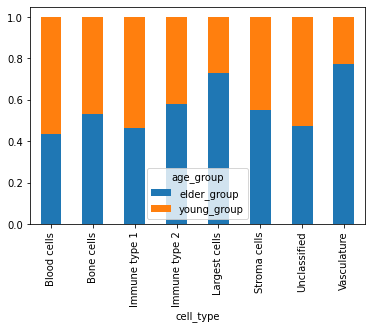

In [12]:
count_community_3.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [13]:
count_community_4=data_1.loc[data_1['cell_interaction'] == 'community_4']
count_community_4
# количество community_4 = 80969

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
7,663.260477,743.314465,16.802267,123.042648,community_4,Stroma cells,891,254,elder_group
8,715.872214,706.074967,10.135094,108.936363,community_4,Stroma cells,891,331,elder_group
23,697.515974,747.289438,19.083657,171.974201,community_4,Stroma cells,891,135,elder_group
25,681.372289,720.789007,10.663821,189.053994,community_4,Stroma cells,891,368,elder_group
56,647.795699,646.528438,10.544203,216.723971,community_4,Stroma cells,891,450,elder_group
...,...,...,...,...,...,...,...,...,...
269434,796.544007,1017.561182,3.896588,30.709678,community_4,Stroma cells,983,195,young_group
269435,675.439430,963.328712,7.037208,27.434407,community_4,Stroma cells,983,525,young_group
269436,756.724495,621.686459,8.249116,23.699652,community_4,Stroma cells,983,279,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


<AxesSubplot: xlabel='cell_type'>

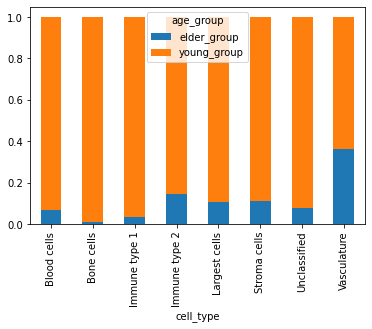

In [14]:
count_community_4.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [15]:
count_community_5=data_1.loc[data_1['cell_interaction'] == 'community_5']
count_community_5

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
18,648.292289,642.474936,19.886705,112.498234,community_5,Stroma cells,891,210,elder_group
24,664.164388,693.815542,14.175209,172.635499,community_5,Stroma cells,891,309,elder_group
40,737.297096,732.813454,13.601498,286.372754,community_5,Stroma cells,891,330,elder_group
43,681.351763,642.168888,9.631409,134.772915,community_5,Unclassified,891,233,elder_group
45,638.705859,822.289349,9.442239,119.558352,community_5,Unclassified,891,204,elder_group
...,...,...,...,...,...,...,...,...,...
269309,1053.885447,616.017277,15.864921,20.206692,community_5,Unclassified,983,237,young_group
269322,734.641646,759.437038,26.121501,38.228953,community_5,Unclassified,983,190,young_group
269334,737.215462,1012.773807,14.186660,111.787329,community_5,Unclassified,983,105,young_group
269338,686.360034,811.660717,8.014409,35.235228,community_5,Unclassified,983,536,young_group


<AxesSubplot: xlabel='cell_type'>

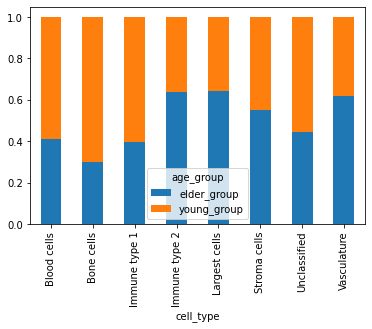

In [16]:
count_community_5.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [17]:
count_community_6=data_1.loc[data_1['cell_interaction'] == 'community_6']
count_community_6

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
52,871.129145,609.949327,15.438529,179.608425,community_6,Unclassified,891,81,elder_group
70,811.364784,827.572022,24.829346,188.200752,community_6,Stroma cells,891,145,elder_group
75,947.767468,616.670323,4.469803,150.787029,community_6,Stroma cells,891,241,elder_group
82,711.652056,602.970394,9.238120,150.456298,community_6,Stroma cells,891,209,elder_group
83,659.995782,621.095335,16.436083,201.447674,community_6,Stroma cells,891,175,elder_group
...,...,...,...,...,...,...,...,...,...
269417,835.907589,645.505356,16.917086,41.510724,community_6,Stroma cells,983,216,young_group
269419,873.134215,772.784006,9.536660,38.280659,community_6,Stroma cells,983,223,young_group
269429,1186.013536,815.514952,7.690244,32.580612,community_6,Unclassified,983,166,young_group
269430,1113.365851,844.921588,6.912644,26.499099,community_6,Stroma cells,983,223,young_group


<AxesSubplot: xlabel='cell_type'>

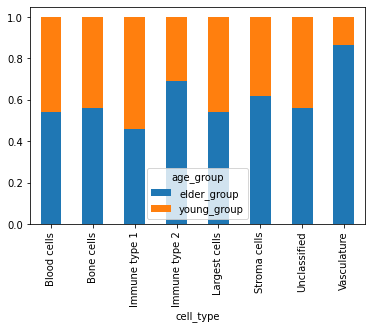

In [18]:
count_community_6.groupby(['cell_type'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

3) Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения, по Оу — их доля в ткани пациента. Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной

<AxesSubplot: xlabel='cell_interaction'>

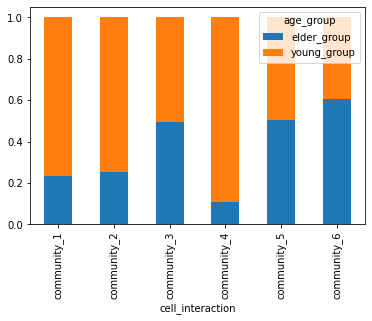

In [19]:
data_1.groupby(['cell_interaction'])['age_group'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

Задание 3

В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток, по Оу — их количество. Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной. 

<AxesSubplot: xlabel='cell_type'>

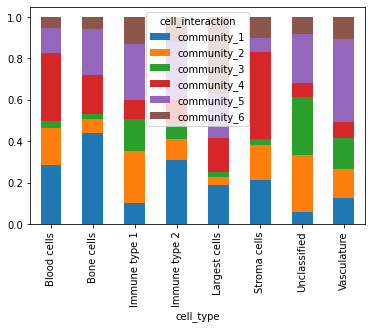

In [20]:
data_1.groupby(['cell_type'])['cell_interaction'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [ ]:
Задание 4

Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
import seaborn as sns

plt.style.use('ggplot')

data_1 = pd.read_csv('community_dataset.csv')
data_1


,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


In [26]:
data_1.cell_type.value_counts()

Stroma cells     173192
Unclassified      66966
Immune type 2     16204
Immune type 1      5575
Blood cells        2818
Bone cells         2555
Largest cells      1988
Vasculature         144
Name: cell_type, dtype: int64

In [16]:
data_1.groupby('cell_type').agg({'distance_to_vasculature': 'count'})

,distance_to_vasculature
cell_type,
Blood cells,2818
Bone cells,2555
Immune type 1,5575
Immune type 2,16204
Largest cells,1988
Stroma cells,173192
Unclassified,66966
Vasculature,144


In [17]:
data_1.groupby('cell_type').agg({'distance_to_vasculature': 'mean'})

,distance_to_vasculature
cell_type,
Blood cells,974.268348
Bone cells,985.014241
Immune type 1,931.842702
Immune type 2,875.947219
Largest cells,897.199932
Stroma cells,938.841588
Unclassified,914.092616
Vasculature,576.569518


In [18]:
data_1.groupby('cell_type').agg({'distance_to_largest_cell': 'mean'})

,distance_to_largest_cell
cell_type,
Blood cells,766.868038
Bone cells,773.080667
Immune type 1,757.067652
Immune type 2,751.277087
Largest cells,576.490927
Stroma cells,766.324174
Unclassified,766.417659
Vasculature,773.567973


In [12]:
data_1.age_group.value_counts()

young_group    188900
elder_group     80542
Name: age_group, dtype: int64

In [30]:
# Фильтрация столбца возраст на 2 возрастные группы
age_el = ['elder_group']
data_elder=data_1.loc[data_1['age_group'].isin(age_el)]
data_elder

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
264455,1173.599603,664.281005,16.897153,30.890528,community_4,Unclassified,566,189,elder_group
264456,685.852246,655.175160,11.893887,24.487760,community_2,Stroma cells,566,240,elder_group
264457,663.379860,645.536011,26.845390,51.286679,community_2,Stroma cells,566,203,elder_group
264458,991.858530,617.422598,16.450559,53.811336,community_2,Unclassified,566,155,elder_group


Анализ группы data_elder

In [31]:
data_elder.cell_type.value_counts()

Stroma cells     45784
Unclassified     23735
Immune type 2     7557
Immune type 1     1583
Largest cells      879
Blood cells        521
Bone cells         391
Vasculature         92
Name: cell_type, dtype: int64

In [35]:
data_elder.groupby('cell_type').agg({'distance_to_vasculature': 'mean'})

,distance_to_vasculature
cell_type,
Blood cells,836.958176
Bone cells,831.525807
Immune type 1,817.844810
Immune type 2,800.213120
Largest cells,828.905907
Stroma cells,830.807948
Unclassified,822.851933
Vasculature,576.583463


In [36]:
data_elder.groupby('cell_type').agg({'distance_to_largest_cell': 'mean'})

,distance_to_largest_cell
cell_type,
Blood cells,766.764053
Bone cells,765.855248
Immune type 1,760.573066
Immune type 2,736.503375
Largest cells,576.491693
Stroma cells,760.470815
Unclassified,752.900666
Vasculature,799.454448


<AxesSubplot: xlabel='distance_to_vasculature'>

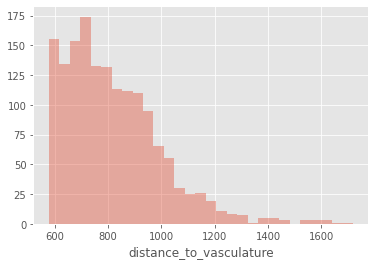

In [71]:
sns.distplot(data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_vasculature'>

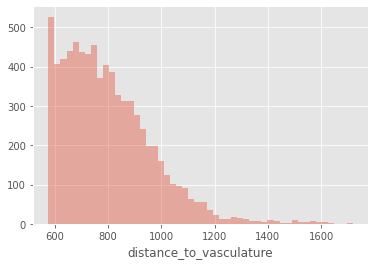

In [72]:
sns.distplot(data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_vasculature'>

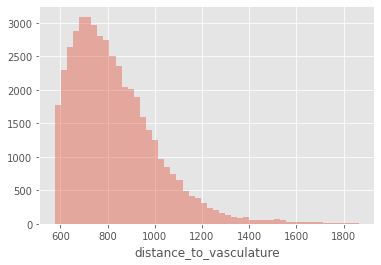

In [73]:
sns.distplot(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

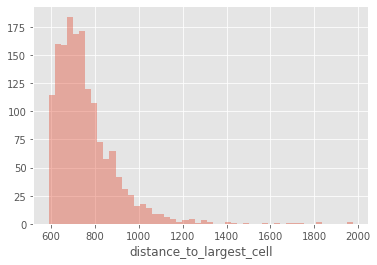

In [74]:
sns.distplot(data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_largest_cell, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

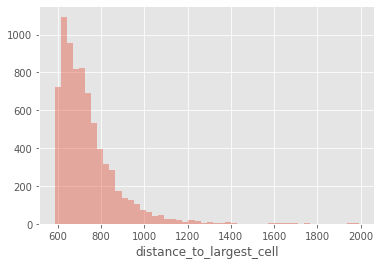

In [75]:
sns.distplot(data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_largest_cell, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

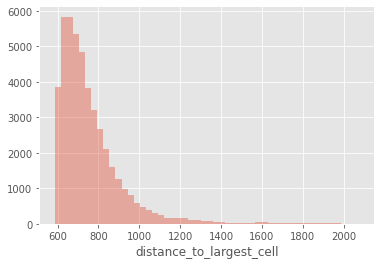

In [76]:
sns.distplot(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, kde=False)

ВСе распределения отличны от нормального неообходимо использовать критерий Манна -Уитни

In [77]:
mannwhitneyu(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_vasculature)

MannwhitneyuResult(statistic=37800709.0, pvalue=0.0034825358984153496)

In [78]:
mannwhitneyu(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_vasculature)

MannwhitneyuResult(statistic=189587912.0, pvalue=7.931274396275806e-41)

In [79]:
mannwhitneyu(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, 
             data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_largest_cell)

MannwhitneyuResult(statistic=34736985.0, pvalue=0.005010196965827519)

In [80]:
mannwhitneyu(data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, 
             data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_largest_cell)

MannwhitneyuResult(statistic=186937644.0, pvalue=2.5129128927013243e-29)

Согласно теста Манна Уитни в старшей возрастной группе  между  Stroma cells и Immune type 1 и Immune type 2
есть достоверная разница расстояний distance_to_vasculature и distance_to_largest_cell 

In [41]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

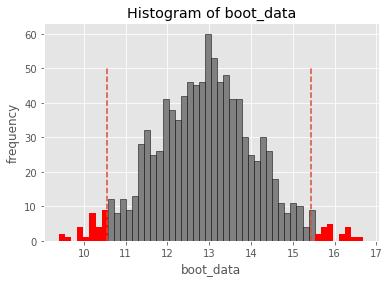

{'boot_data': [13.242805622151995,
  14.89143147188056,
  11.485808844957074,
  15.135572452178842,
  14.371076352722861,
  11.627852873595566,
  10.205708543666452,
  13.414235296171071,
  12.660955967436806,
  12.111677397706858,
  13.268075832015247,
  11.262089036371886,
  13.965428736331916,
  13.223110095569371,
  14.280529719029175,
  11.263071694420386,
  12.209428386775544,
  12.555330109527945,
  13.684329074159482,
  13.378586200191632,
  13.454680040794418,
  15.120373733366312,
  13.012056860864444,
  13.689611184055103,
  13.490256290017337,
  13.551294260317997,
  12.63233245660034,
  12.434709392237643,
  13.416959691050762,
  12.922792776936442,
  16.337245009338837,
  10.815968896390963,
  12.578450224254551,
  12.985720744451417,
  12.986718188699623,
  12.055464946684454,
  12.686787647936349,
  12.28229361924542,
  13.305094368264879,
  12.392167720208226,
  12.541008462111968,
  15.94695066135112,
  12.649177164638804,
  13.432829621883858,
  15.3181938855322,
  1

In [82]:
get_bootstrap(
    data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

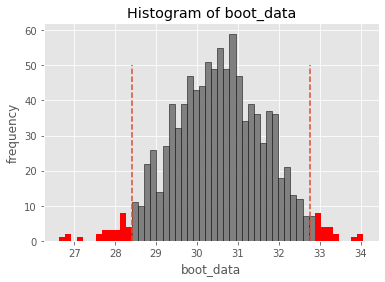

{'boot_data': [30.598295162065533,
  30.905847286310195,
  29.9687407099573,
  30.44126802666046,
  30.149582061781217,
  28.37879915529668,
  28.057684979155216,
  30.87772192603255,
  29.52300946570483,
  31.515666741972648,
  28.817104310284897,
  29.132197713387267,
  29.79816438474458,
  30.875159760763275,
  30.928638108428355,
  31.926655851018953,
  33.0493307347401,
  30.010978338377853,
  31.256015227989916,
  30.708616075350406,
  29.37387152928578,
  31.482998982303094,
  29.387384101646727,
  31.128808896798073,
  31.95836705490306,
  30.863364537450696,
  31.785800211498103,
  31.81623418756521,
  30.251605212054375,
  29.76484333654294,
  31.027065164856097,
  28.866807143833167,
  30.33009139981251,
  30.38127579817321,
  31.033777960843874,
  31.40677250285519,
  31.75773272771002,
  27.793698681968994,
  30.068363499048502,
  29.991521607876432,
  29.438458955976376,
  31.265794997527166,
  32.29437358586124,
  29.732041830967564,
  31.94368842226385,
  29.73708887452

In [84]:
get_bootstrap(
    data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_elder[data_elder.cell_type == 'Immune type 2'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

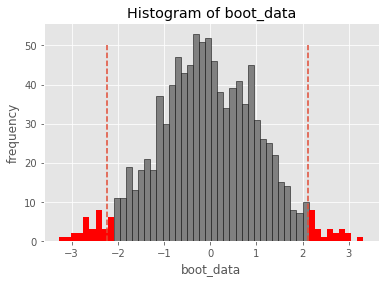

{'boot_data': [0.1476808156472904,
  0.38922177277134756,
  0.5991576727913023,
  -1.055684666772303,
  -0.5423609522480372,
  2.4427470717162674,
  0.6612350475302408,
  -0.14893421511257227,
  0.16223746240966275,
  -0.13603125182485787,
  0.05259544657961146,
  0.14726990784451102,
  -2.0699267678341244,
  -0.637580322085968,
  -0.32276383693594124,
  -0.855405258799827,
  0.4800150337624755,
  -2.1121755664892263,
  -1.976628993156708,
  1.0667280745277155,
  -0.6109743015190702,
  -0.05761312479962438,
  1.177824934815298,
  -0.8477789100186952,
  1.1090720170373323,
  -0.9148698413512921,
  0.22511199390917316,
  1.4242364640503118,
  0.9355768277425579,
  -0.7756941264729451,
  1.099782854169749,
  -1.439907693693316,
  -0.518260117537552,
  0.549545175357479,
  0.9403116724409678,
  -0.7978096213313505,
  -0.21433506605675393,
  -0.8609870092059521,
  0.14829255375393752,
  -0.45588733811196175,
  0.787415095292575,
  0.8595096701626113,
  -0.3463522204413259,
  0.1702528617391

In [85]:
get_bootstrap(
    data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, 
    data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_largest_cell, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

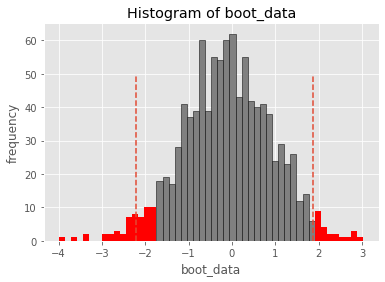

{'boot_data': [-1.314194822561643,
  -0.263723125162547,
  0.8304736118636312,
  -1.6053089114495096,
  -1.259862714513887,
  1.8110921662254007,
  1.0903204364612538,
  0.4727173107310682,
  2.0822436905979878,
  -0.635026987338819,
  -0.9896973681213129,
  1.0496071037965722,
  0.28901473295698865,
  0.7986098352379524,
  0.14382319242636632,
  -0.5832468599886698,
  0.7450979596833283,
  0.364575208878483,
  0.9761509121086761,
  -0.413111221563472,
  0.0065074708388916745,
  0.3926953671172056,
  1.7106483688861278,
  -2.1358726669932113,
  -0.013376801566243756,
  -0.5336605588494784,
  -1.8663063094700036,
  -1.1165817210134885,
  0.3672626158956436,
  -1.8924243193249803,
  0.4285128109010506,
  -0.5235411510520173,
  -1.5567796145551498,
  -0.6815054850139093,
  0.41125537328178846,
  -0.7359048691402204,
  -1.5657849959331378,
  -2.793300764332337,
  -0.6241004282160008,
  -1.8344850627626197,
  -0.03500232430744952,
  0.45328432952616965,
  0.10054980423077572,
  -0.525477253

In [86]:
get_bootstrap(
    data_elder[data_elder.cell_type == 'Stroma cells'].distance_to_largest_cell, 
    data_elder[data_elder.cell_type == 'Immune type 1'].distance_to_largest_cell, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

In [ ]:
Вывод по старшей группе:
    
    Согласно буттстраппингу в  старшей возрастной группе имеется достоверная разница расстояния distance_to_vasculature от 
Stroma cells до  Immune type 1  95%ДИ 10.549953;  15.422472,p_value= 1.863566785290564e-26
Stroma cells до  Immune type 2   95% ДИ 28.404208;32.752851,p_value=2.3802862097100526e-158

для distance_to_largest_cell в старшей возрастной группе нет достоверной разницы 
Stroma cells до  Immune type 1  95%ДИ -2.237871; 2.113639, p_value= 0.9627314461696499
Stroma cells до  Immune type 2   95% ДИ -2.216168; 1.872341, p_value= 0.9170145277914186


In [ ]:
Анализ группы data_young

In [87]:
age_yo = ['young_group']
data_young=data_1.loc[data_1['age_group'].isin(age_yo)]
data_young

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
315,634.200203,983.403426,26.426694,133.223933,community_2,Stroma cells,199,261,young_group
316,610.444296,1000.488024,22.419208,49.971129,community_2,Immune type 2,199,142,young_group
317,782.995484,787.660055,36.285363,42.974851,community_5,Stroma cells,199,344,young_group
318,811.000834,608.351406,19.874799,34.869501,community_1,Stroma cells,199,170,young_group
319,704.830780,883.960378,35.305848,31.188793,community_3,Immune type 1,199,224,young_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


In [46]:
data_young.cell_type.value_counts()

Stroma cells     127408
Unclassified      43231
Immune type 2      8647
Immune type 1      3992
Blood cells        2297
Bone cells         2164
Largest cells      1109
Vasculature          52
Name: cell_type, dtype: int64

In [47]:
data_young.groupby('cell_type').agg({'distance_to_vasculature': 'mean'})

,distance_to_vasculature
cell_type,
Blood cells,1005.412710
Bone cells,1012.747132
Immune type 1,977.047778
Immune type 2,942.134636
Largest cells,951.330183
Stroma cells,977.663422
Unclassified,964.186244
Vasculature,576.544846


In [48]:
data_young.groupby('cell_type').agg({'distance_to_largest_cell': 'mean'})

,distance_to_largest_cell
cell_type,
Blood cells,766.891623
Bone cells,774.386183
Immune type 1,755.677605
Immune type 2,764.188496
Largest cells,576.490319
Stroma cells,768.427575
Unclassified,773.838858
Vasculature,727.768825


C:\Users\79024\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='distance_to_vasculature'>

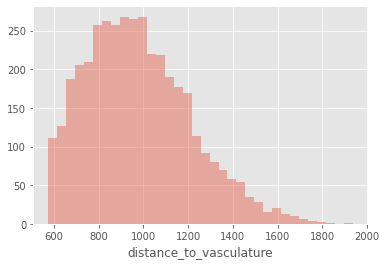

In [89]:
sns.distplot(data_young[data_young.cell_type == 'Immune type 1'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_vasculature'>

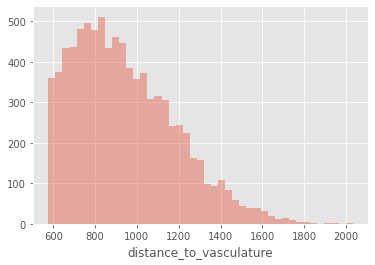

In [90]:
sns.distplot(data_young[data_young.cell_type == 'Immune type 2'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_vasculature'>

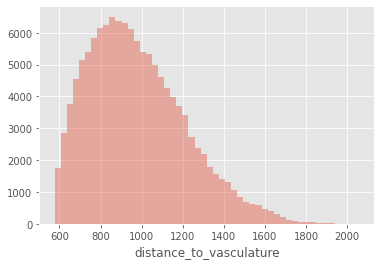

In [91]:
sns.distplot(data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

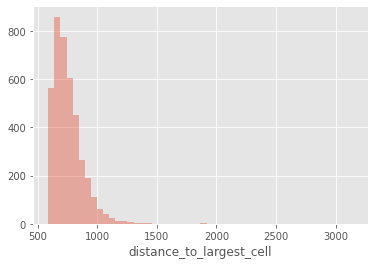

In [92]:
sns.distplot(data_young[data_young.cell_type == 'Immune type 1'].distance_to_largest_cell, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

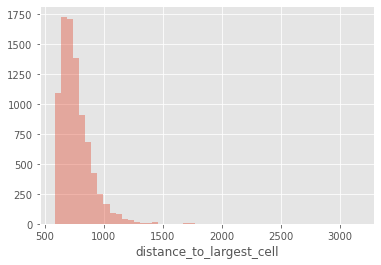

In [93]:
sns.distplot(data_young[data_young.cell_type == 'Immune type 2'].distance_to_largest_cell, kde=False)

<AxesSubplot: xlabel='distance_to_largest_cell'>

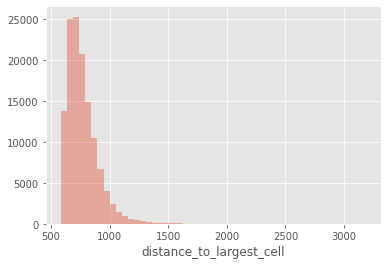

In [94]:
sns.distplot(data_young[data_young.cell_type == 'Stroma cells'].distance_to_largest_cell, kde=False)

ВСе распределения отличны от нормального неообходимо использовать критерий Манна -Уитни

In [88]:
mannwhitneyu(data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_young[data_young.cell_type == 'Immune type 1'].distance_to_vasculature)

MannwhitneyuResult(statistic=253083176.0, pvalue=0.6042398832100448)

In [95]:
mannwhitneyu(data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, 
             data_young[data_young.cell_type == 'Immune type 2'].distance_to_vasculature)

MannwhitneyuResult(statistic=603252700.0, pvalue=9.734109291647457e-50)

In [96]:
mannwhitneyu(data_young[data_young.cell_type == 'Stroma cells'].distance_to_largest_cell, 
             data_young[data_young.cell_type == 'Immune type 1'].distance_to_largest_cell)

MannwhitneyuResult(statistic=270455737.0, pvalue=7.749469546424229e-12)

In [97]:
mannwhitneyu(data_young[data_young.cell_type == 'Stroma cells'].distance_to_largest_cell, 
             data_young[data_young.cell_type == 'Immune type 2'].distance_to_largest_cell)

MannwhitneyuResult(statistic=565070274.0, pvalue=5.722501887051686e-05)

In [ ]:
Согласно теста Манна Уитни в младшей  возрастной группе  между 
между  Stroma cells и Immune type 1
есть достоверная разница расстояний distance_to_largest_cell
 между Stroma cells и Immune type 2
есть достоверная разница расстояний distance_to_vasculature и distance_to_largest_cell,  


  0%|          | 0/1000 [00:00<?, ?it/s]

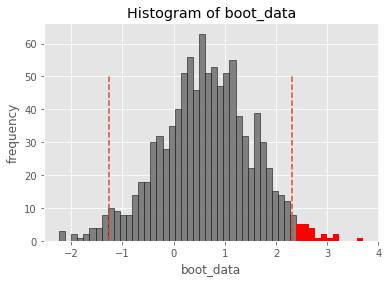

{'boot_data': [-0.29751950925750864,
  1.3164107816290538,
  1.0005117732924478,
  -0.7692886580467492,
  0.7647691308116765,
  -0.9891353804390247,
  2.2373151759469767,
  1.364808086510105,
  0.8158812277550931,
  -0.2921157966768053,
  -0.16004216687293263,
  0.6380138179117223,
  0.29797221493561077,
  0.4907986281505464,
  0.14428131769825653,
  0.3126206309704493,
  0.4707380133914827,
  0.07746711322577873,
  1.4552983945128586,
  0.3673666233227023,
  1.0554574963292827,
  0.3004174666906924,
  1.0928092945339773,
  0.6642985085817781,
  0.7619653410035164,
  1.321829755890187,
  0.031004466799745792,
  -0.06997056529959415,
  -0.42934619766208193,
  0.8019931242013703,
  2.0773676749151346,
  -0.6129502380416116,
  0.2193592276179309,
  0.8290062171608256,
  1.278972602949904,
  0.5199104548696387,
  1.2487485744598474,
  1.0177259440897475,
  0.6154258358737296,
  -1.3524550759391838,
  2.8742738731976436,
  1.3004965607268,
  1.6317335917806381,
  0.8862901823813921,
  0.743

In [51]:
get_bootstrap(
    data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_young[data_young.cell_type == 'Immune type 1'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

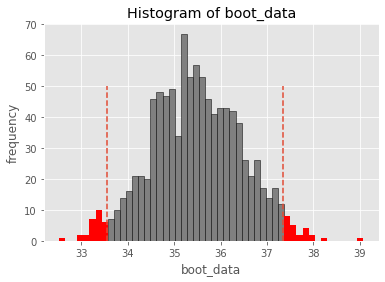

{'boot_data': [33.66861089142705,
  34.410287051434366,
  34.77036119188976,
  35.22546291082302,
  35.61928666028315,
  34.89919468421699,
  37.07018397519336,
  34.9383098645348,
  35.32598423526678,
  35.19237747427591,
  35.56478407601562,
  36.52183928613634,
  35.069376198433346,
  35.67355191697199,
  33.73965544684299,
  35.47559417929374,
  33.925771438176746,
  35.27597753695067,
  34.58629560558945,
  35.33379751037835,
  35.07225843975635,
  35.13269304508114,
  36.04166966137524,
  35.9130209596067,
  35.22467076327377,
  34.43581825614593,
  35.23670171933774,
  34.5012767868135,
  36.24391884945628,
  36.2819641942956,
  35.37775977006998,
  35.2110723256029,
  34.63281885354527,
  36.080309776144034,
  34.2647324035738,
  35.6322369873722,
  34.978786118712776,
  35.39098627882074,
  34.85232771336913,
  34.153679279216696,
  35.43357780751001,
  36.190110051453615,
  35.889632855081494,
  34.72333513969342,
  35.80692804763814,
  35.77914920411,
  36.68995288024533,
  

In [98]:
get_bootstrap(
    data_young[data_young.cell_type == 'Stroma cells'].distance_to_vasculature, 
    data_young[data_young.cell_type == 'Immune type 2'].distance_to_vasculature, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

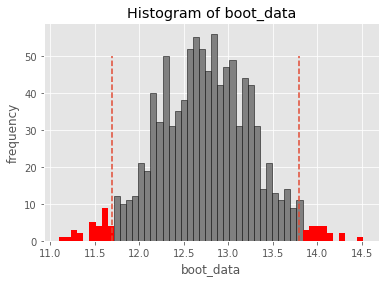

{'boot_data': [12.270894720497855,
  12.570919591500473,
  13.238177082094289,
  12.687237231331192,
  13.142859835006195,
  11.496733735277154,
  13.018668959813697,
  12.337746172807279,
  12.323919280641336,
  12.336384146485777,
  12.360396345967171,
  13.167004012117744,
  13.122346990371545,
  13.475564288842701,
  12.156520592685027,
  11.763115190543335,
  12.542985231417104,
  13.810884915566302,
  12.696999052098883,
  13.175498274529643,
  12.413709534508293,
  13.204274173038117,
  13.527846329692485,
  11.983714956433845,
  11.708005513591882,
  12.22368097588612,
  12.567578004527626,
  12.626803621857007,
  12.5859246350177,
  13.225090312560228,
  13.344810280345982,
  12.386912719404222,
  12.171437331755625,
  12.777528364199158,
  13.243595420437007,
  13.163617778800454,
  12.964326489924641,
  14.121229127798179,
  12.591554093461474,
  12.714612657276783,
  11.254059219790232,
  12.539305750147467,
  13.262145485249901,
  12.625914106396,
  13.028454243892236,
  1

In [99]:
get_bootstrap(
    data_young[data_young.cell_type == 'Stroma cells'].distance_to_largest_cell, 
    data_young[data_young.cell_type == 'Immune type 1'].distance_to_largest_cell, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

  0%|          | 0/1000 [00:00<?, ?it/s]

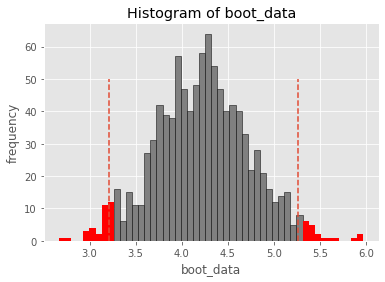

{'boot_data': [4.394046787415411,
  4.255099472458432,
  4.304374144053079,
  3.7814889440716186,
  3.8033056381124166,
  5.155722414716512,
  3.6257219806839474,
  5.924094794409871,
  4.474367187423166,
  4.586864817507715,
  4.443506164747043,
  4.096487239459584,
  4.7642190874294705,
  4.89153022076813,
  4.51729455498974,
  5.0809521135684115,
  4.318826492931895,
  3.409623518539634,
  4.817527890663354,
  4.905349428736972,
  3.778355432840669,
  3.7187928682635976,
  4.436282829741073,
  4.346340533590832,
  3.8701334280044684,
  3.2218364151419063,
  3.6628483303839294,
  3.925539284088116,
  3.967848092069739,
  5.02916499853356,
  4.245306973269381,
  5.398175034836788,
  4.2638958311008315,
  3.2951582669141244,
  3.962473714256755,
  4.53258941318746,
  4.371365229752043,
  4.9176438753185785,
  4.413374853384444,
  4.5660830862813055,
  3.9498507206043914,
  4.022508509521834,
  3.753167717120479,
  3.8056628041578615,
  4.684192856568648,
  4.516667413898604,
  2.976922

In [101]:
get_bootstrap(
    data_young[data_young.cell_type == 'Stroma cells'].distance_to_largest_cell, 
    data_young[data_young.cell_type == 'Immune type 2'].distance_to_largest_cell, 
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

 Вывод по младшей группе:
 
 Согласно бутсраппингу в младшей  возрастной группе  между 
между  Stroma cells и Immune type 1
есть достоверная разница  только для расстояния distance_to_largest_cell 
95% ДИ (11.690332;13.788278)p_value=7.58732973887145e-125

между Stroma cells и Immune type 2
есть достоверная разница для обоих  расстояний
distance_to_vasculature  ( 95% ДИ 33.551820;37.349042, p_value=7.207657167356364e-294 
distance_to_largest_cell ( 95% ДИ  3.210543;  5.264325, p_value= 8.415264304881557e-17



In [ ]:
Задание 5

In [ ]:
Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? 
Эту гипотезу необходимо проверить пермутационным тестом.
В качестве исходной статистики берем массив с расстояниями только для данного типа клеток (длина - n),
запоминаем среднее для каждого пациента. На каждой итерации набираем выборку размером n из всей!
колонки с расстояниями до сосудов и смотрим соотношение с исходной статистикой.
Проверяем гипотезы. Комбинировать p-values для каждой возрастной группы можно с помощью этого инструмента.

In [144]:
dist_im = ['Immune type 1']
dist_im1=data_young.loc[data_young['cell_type'].isin(dist_im)]
dist_im1

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
319,704.830780,883.960378,35.305848,31.188793,community_3,Immune type 1,199,224,young_group
362,930.563167,725.691921,35.846980,33.432744,community_5,Immune type 1,199,346,young_group
381,1203.410427,747.918069,42.871231,85.548287,community_2,Immune type 1,199,270,young_group
387,1269.298194,724.178711,34.452029,32.166399,community_5,Immune type 1,199,290,young_group
403,1099.300967,846.795393,38.655324,75.176789,community_3,Immune type 1,199,146,young_group
...,...,...,...,...,...,...,...,...,...
269154,748.842981,665.593721,27.193284,112.991881,community_6,Immune type 1,983,281,young_group
269159,1128.277384,610.023305,29.701964,61.239620,community_2,Immune type 1,983,234,young_group
269291,816.327661,644.352341,21.983462,65.690753,community_5,Immune type 1,983,261,young_group
269346,990.942805,686.569462,19.343275,44.991352,community_6,Immune type 1,983,139,young_group


In [146]:
dist_im1["distance_to_vasculature"].mean()

977.0477784774288

In [147]:
dist_im = ['Immune type 2']
dist_im2=data_young.loc[data_young['cell_type'].isin(dist_im)]
dist_im2

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
316,610.444296,1000.488024,22.419208,49.971129,community_2,Immune type 2,199,142,young_group
330,900.340098,712.535822,16.178258,31.953724,community_2,Immune type 2,199,106,young_group
357,1015.186492,780.256333,26.519416,26.983333,community_1,Immune type 2,199,279,young_group
372,1024.254283,802.646867,28.231445,22.642534,community_5,Immune type 2,199,249,young_group
373,940.093360,771.731995,10.592811,12.593582,community_5,Immune type 2,199,284,young_group
...,...,...,...,...,...,...,...,...,...
269345,1024.091608,702.332248,13.106792,31.820863,community_4,Immune type 2,983,175,young_group
269351,910.749758,1257.460219,18.157178,87.921298,community_6,Immune type 2,983,137,young_group
269399,916.562408,942.933560,8.369391,34.282472,community_1,Immune type 2,983,268,young_group
269411,1105.756238,604.533705,12.235670,13.722748,community_1,Immune type 2,983,413,young_group


In [148]:
dist_im2["distance_to_vasculature"].mean()

942.1346360040343

У молодых среднее для Immune type 1=977.04,  для Immune type 2=942.13

In [149]:
dist_im = ['Immune type 1']
dist_im1=data_elder.loc[data_elder['cell_type'].isin(dist_im)]
dist_im1

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
265,764.883957,718.650499,27.505675,125.199847,community_5,Immune type 1,891,128,elder_group
299,576.815150,860.814600,28.549706,138.220734,community_5,Immune type 1,891,160,elder_group
1882,576.674164,1162.638460,67.541675,136.832896,community_5,Immune type 1,40,245,elder_group
1952,749.669512,720.221591,53.890241,37.970080,community_2,Immune type 1,40,213,elder_group
2055,899.082080,631.848217,34.961446,24.185655,community_5,Immune type 1,40,323,elder_group
...,...,...,...,...,...,...,...,...,...
263962,1063.790746,1826.692044,17.559165,87.596874,community_6,Immune type 1,559,379,elder_group
263983,743.512755,689.638631,61.536232,61.680140,community_6,Immune type 1,566,257,elder_group
264126,578.316999,729.892391,76.844212,71.599272,community_2,Immune type 1,566,269,elder_group
264372,674.267516,798.449573,34.117831,48.011318,community_3,Immune type 1,566,190,elder_group


In [150]:
dist_im1["distance_to_vasculature"].mean()

817.8448098138385

In [152]:
dist_im = ['Immune type 2']
dist_im2=data_elder.loc[data_elder['cell_type'].isin(dist_im)]
dist_im2

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
35,578.795873,604.065091,28.111050,117.141031,community_2,Immune type 2,891,223,elder_group
36,627.113559,636.046148,31.701647,136.872857,community_2,Immune type 2,891,214,elder_group
44,576.109024,637.306127,50.650625,350.538476,community_2,Immune type 2,891,221,elder_group
60,794.976218,603.989367,15.021383,152.144077,community_3,Immune type 2,891,281,elder_group
63,790.529070,1320.641427,14.800876,168.830195,community_1,Immune type 2,891,215,elder_group
...,...,...,...,...,...,...,...,...,...
264371,582.088910,887.126529,16.980276,43.146605,community_2,Immune type 2,566,283,elder_group
264392,1036.926059,588.561296,30.615500,35.298096,community_1,Immune type 2,566,238,elder_group
264410,824.752971,677.412275,28.847788,47.008442,community_6,Immune type 2,566,160,elder_group
264430,583.116888,821.306384,27.336809,31.889050,community_5,Immune type 2,566,215,elder_group


In [153]:
dist_im2["distance_to_vasculature"].mean()

800.2131197081313

In [ ]:
У молодых среднее для Immune type 1=977.04,  для Immune type 2=942.13
У старших  среднее для Immune type 1=817.8,  для Immune type 2=800.21

In [ ]:
Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? 

Эта гипотеза уже проверена выше и значения p_value получены

Для расстояния distance_to_vasculature

в старшей возрастной группе

имеется достоверная разница 
Immune type 1  p_value= 1.863566785290564e-26
Immune type 2   p_value=2.3802862097100526e-158

в младшей возрастной группе

Immune type 1 не имеют достоверной разницы 
Immune type 2 есть достоверная разница p_value=7.207657167356364e-294

Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов?
Ответ - у молодых лежат достоверно дальше лежат клетки  Immune type 2 